In [ ]:
!pip install pandas==1.3.2

In [ ]:
import pandas as pd

pd.show_versions()

pd.__version__


INSTALLED VERSIONS
------------------
commit           : 5f648bf1706dd75a9ca0d29f26eadfbb595fe52b
python           : 3.7.13.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.4.144+
Version          : #1 SMP Tue Dec 7 09:58:10 PST 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.3.2
numpy            : 1.21.5
pytz             : 2018.9
dateutil         : 2.8.2
pip              : 21.1.3
setuptools       : 57.4.0
Cython           : 0.29.28
pytest           : 3.6.4
hypothesis       : None
sphinx           : 1.8.6
blosc            : None
feather          : 0.4.1
xlsxwriter       : None
lxml.etree       : 4.2.6
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.7.6.1 (dt dec pq3 ext lo64)
jinja2           : 2.11.3
IPython          : 5.5.0
pandas_datareader: 0.9.0
bs4              : 4.6.3
bottleneck       : 1.

'1.3.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv
import pandas as pd
df = pd.read_csv('drive/MyDrive/lower_data1.csv')

In [ ]:
import numpy as np
import pandas as pd
import pickle
from collections import defaultdict
import re
from bs4 import BeautifulSoup
import sys
import os
os.environ['KERAS_BACKEND']='theano'
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
plt.switch_backend('agg')
from keras import backend as K
from tensorflow.keras.layers import Layer, InputSpec
from keras import initializers
%matplotlib inline

In [ ]:
def clean_str(string):
    string = re.sub(r"\\", "", string)
    string = re.sub(r"\'", "", string)
    string = re.sub(r"\"", "", string)
    return string.strip().lower()

In [ ]:
MAX_SEQUENCE_LENGTH = 1000
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 25
VALIDATION_SPLIT = 0.2

In [ ]:
# # 随机交换
# from random import randint, choice
# import random

# def exchange(data,num):
      
#     data = list(data)
#     exchange_num = num*2
#     while exchange_num > 0:
#         exchange_site1 = randint(0, len(data)-1)
#         exchange_site2 = randint(0,len(data)-1)
#         data[exchange_site1],data[exchange_site2] = data[exchange_site2],data[exchange_site1]
#         exchange_num -= 2
#     return ''.join(data)

# sequences_train_exchange = []
# text = df['Text']
# text = [text[i:i+10] for i in range(0,text.shape[0],10)]
# for i in range(len(df['Text'])):
#     sequences_train_exchange.append(exchange(df['Text'][i],5))
#     df['Type'] = df['Type'] + df['Type'][i]
#     df['IE'] = df['IE'] + df['IE'][i]
#     df['SN'] = df['SN'] + df['SN'][i]
#     df['FT'] = df['FT'] + df['FT'][i]
#     df['PJ'] = df['PJ'] + df['PJ'][i]
    
# df['Text'] = df['Text'] + sequences_train_exchange

In [ ]:
# reading data

df = df.dropna()
df = df.reset_index(drop=True)
df['class'] = df['PJ']
df['message'] = df['Text']
print('Shape of dataset ',df.shape)
print(df.columns)
print('No. of unique classes',len(set(df['class'])))

Shape of dataset  (23004, 10)
Index(['Unnamed: 0', 'Name', 'Type', 'Text', 'IE', 'SN', 'FT', 'PJ', 'class',
       'message'],
      dtype='object')
No. of unique classes 2


In [ ]:
macronum=sorted(set(df['class']))
macro_to_id = dict((note, number) for number, note in enumerate(macronum))

def fun(i):
    return macro_to_id[i]

df['class']=df['class'].apply(fun)

In [ ]:
df

,Unnamed: 0,Name,Type,Text,IE,SN,FT,PJ,class,message
0,0,Sasuke Uchiha,ISFP,edit not answer useless decide bring view sasu...,I,S,F,P,1,edit not answer useless decide bring view sasu...
1,1,Sasuke Uchiha,INTJ,conflict sasuke type frankly distinguish emoti...,I,N,T,J,0,conflict sasuke type frankly distinguish emoti...
2,2,Sasuke Uchiha,INTJ,not sasuke selforiented main goal kill brother...,I,N,T,J,0,not sasuke selforiented main goal kill brother...
3,3,Sasuke Uchiha,ISFP,sasuke childhood wound relates type type not l...,I,S,F,P,1,sasuke childhood wound relates type type not l...
4,4,Sasuke Uchiha,INTJ,sasuke vengeful punitive sexual not lustful pr...,I,N,T,J,0,sasuke vengeful punitive sexual not lustful pr...
...,...,...,...,...,...,...,...,...,...,...
22999,22999,Aisha (Lord Azoth),ENTJ,hard type inside ur brain tritype legitimately...,E,N,T,J,0,hard type inside ur brain tritype legitimately...
23000,23000,Aisha / Layla,ESTP,dare vote flirty person love dancin sport acti...,E,S,T,P,1,dare vote flirty person love dancin sport acti...
23001,23001,Aisha / Layla,ISTP,unpopular opinion honestly not classical total...,I,S,T,P,1,unpopular opinion honestly not classical total...
23002,23002,Aisha / Layla,ESTP,obvious season true recall childhood lot traum...,E,S,T,P,1,obvious season true recall childhood lot traum...


In [ ]:
texts = []
labels = []


for idx in range(df.message.shape[0]):
    text = BeautifulSoup(df.message[idx])
    texts.append(clean_str(str(text.get_text().encode())))

for idx in df['class']:
    labels.append(idx)

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index

print('Number of Unique Tokens',len(word_index))

Number of Unique Tokens 79395


In [ ]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


labels = to_categorical(np.asarray(labels))
print('Shape of Data Tensor:', data.shape)
print('Shape of Label Tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]


Shape of Data Tensor: (23004, 1000)
Shape of Label Tensor: (23004, 2)


In [ ]:
labels

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
embeddings_index = {}
f = open('drive/MyDrive/glove.twitter.27B.25d.txt',encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors in Glove 6B 25d.' % len(embeddings_index))

Total 44276 word vectors in Glove 6B 25d.


In [ ]:
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_lstm = Bidirectional(LSTM(100))(embedded_sequences)
preds = Dense(len(macronum), activation='softmax')(l_lstm)
model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("Bidirectional LSTM")
model.summary()

Bidirectional LSTM
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1000)]            0         
                                                                 
 embedding_1 (Embedding)     (None, 1000, 25)          1984900   
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              100800    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 2)                 402       
                                                                 
Total params: 2,086,102
Trainable params: 2,086,102
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp=ModelCheckpoint('25_PJ_model_rnn1.hdf5',monitor='val_acc',verbose=1,save_best_only=True)
history=model.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=15, batch_size=32,callbacks=[cp])

Epoch 1/15
576/576 [==============================] - ETA: 0s - loss: 0.6948 - acc: 0.5214
Epoch 1: val_acc improved from -inf to 0.52370, saving model to 25_PJ_model_rnn1.hdf5
576/576 [==============================] - 47s 74ms/step - loss: 0.6948 - acc: 0.5214 - val_loss: 0.6943 - val_acc: 0.5237
Epoch 2/15
576/576 [==============================] - ETA: 0s - loss: 0.6712 - acc: 0.5867
Epoch 2: val_acc improved from 0.52370 to 0.59522, saving model to 25_PJ_model_rnn1.hdf5
576/576 [==============================] - 41s 70ms/step - loss: 0.6712 - acc: 0.5867 - val_loss: 0.6663 - val_acc: 0.5952
Epoch 3/15
576/576 [==============================] - ETA: 0s - loss: 0.6133 - acc: 0.6669
Epoch 3: val_acc improved from 0.59522 to 0.64565, saving model to 25_PJ_model_rnn1.hdf5
576/576 [==============================] - 41s 71ms/step - loss: 0.6133 - acc: 0.6669 - val_loss: 0.6535 - val_acc: 0.6457
Epoch 4/15
576/576 [==============================] - ETA: 0s - loss: 0.5461 - acc: 0.7245
Epo

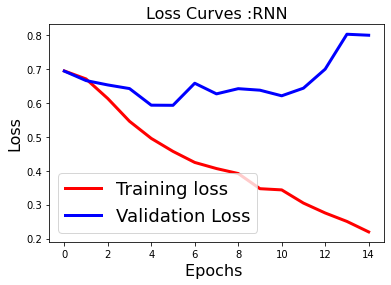

In [ ]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :RNN',fontsize=16)
fig1.savefig('loss_rnn.png')
plt.show()

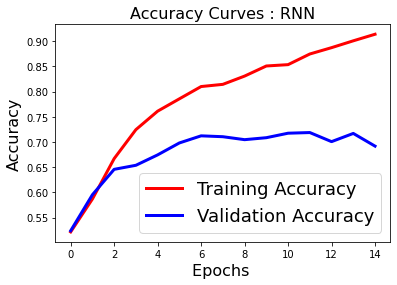

In [ ]:
fig2=plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : RNN',fontsize=16)
fig2.savefig('accuracy_rnn.png')
plt.show()

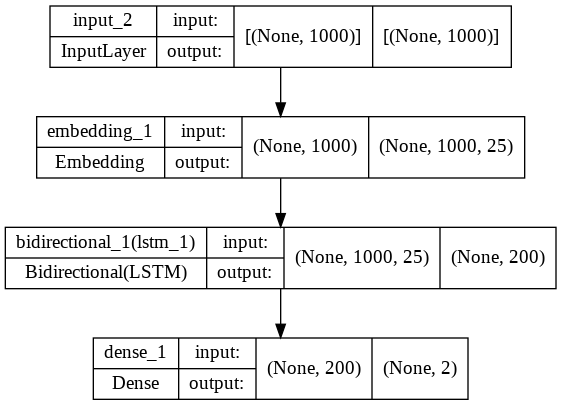

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='rnn_model.png', show_shapes=True, show_layer_names=True)

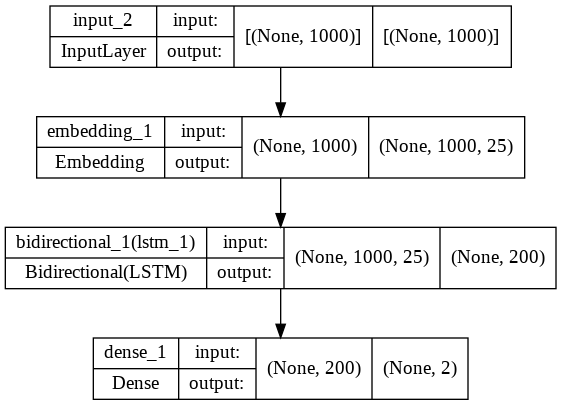

In [ ]:
from PIL import Image
display(Image.open('rnn_model.png'))